In [ ]:
#!pip install scikit-learn
#!pip install xgboost
#!pip install lightgbm 

In [185]:
# Importing relevant the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [187]:
# Loading in the data
data = pd.read_csv("Loan_default.csv")
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [191]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


## Data Cleaning

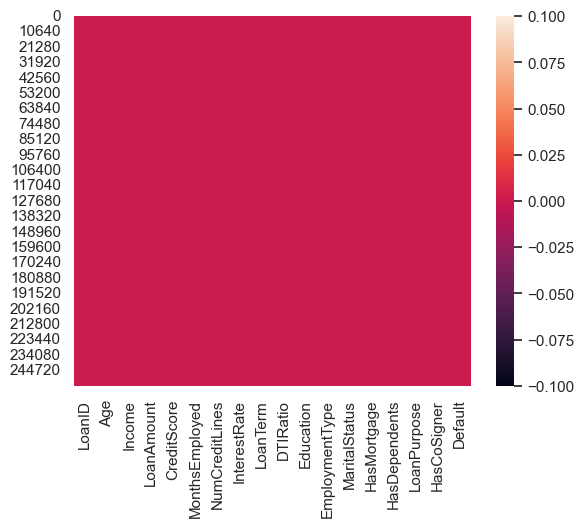

In [194]:
# Checking for missing values
data.isnull().sum()
sns.heatmap(data.isnull());

In [195]:
# check for duplicates
data.duplicated().sum()

0

In [196]:
# Dropping irrelevant columns
data.drop("LoanID",axis=1, inplace =True)
data.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


## Exploratory Data Analysis

In [198]:
data.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


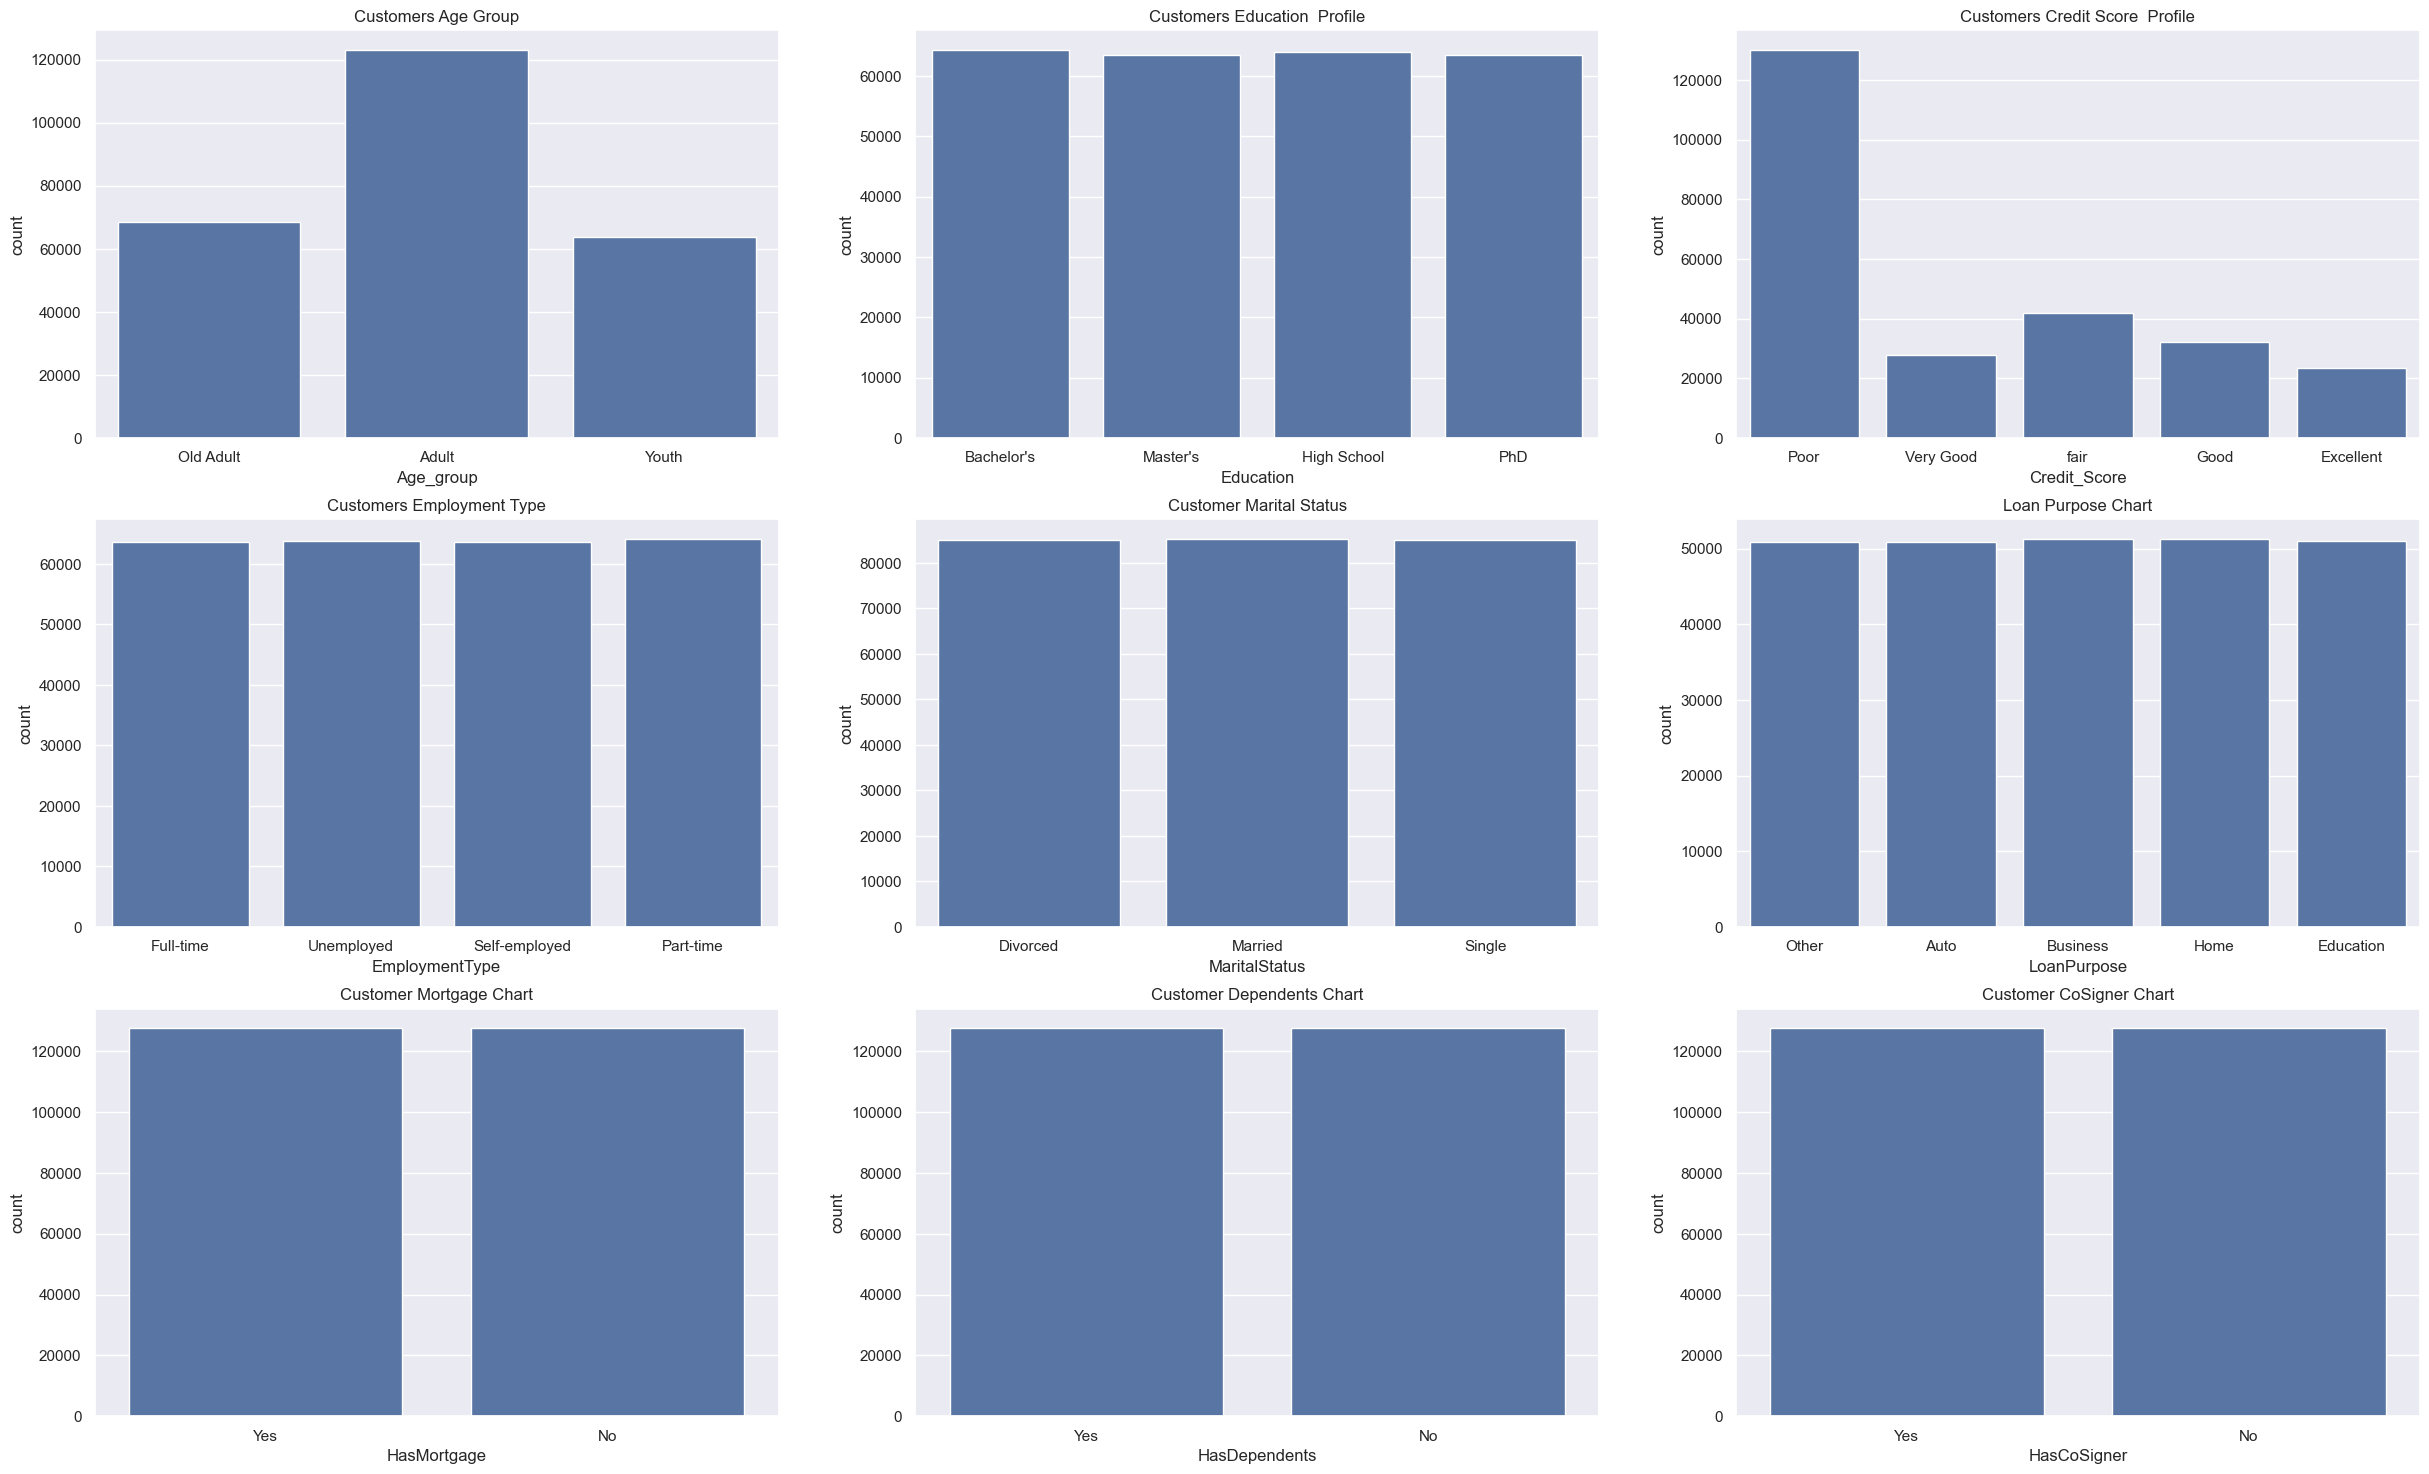

In [199]:
# Investigating the individual features

data["Age"].value_counts()
(data["Education"].value_counts())
(data["CreditScore"].value_counts())

# Creating the age column into groups

def age_group(age):
    if age <= 30:
        return("Youth")
    elif age <= 55:
        return ("Adult")
    else:
        return("Old Adult")
data["Age_group"] = data["Age"].apply(age_group)

def credit_score(score):
    if score <= 579:
        return("Poor")
    elif score <= 669:
        return ("fair")
    elif score <= 739:
        return ("Good")
    elif score <= 799:
        return ("Very Good")
    else:
        return("Excellent")

data["Credit_Score"] = data["CreditScore"].apply(credit_score)

# Visualizing the different features
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(30, 18))
sns.countplot(x="Age_group", data = data, ax=axs[0,0])
axs[0,0].set_title("Customers Age Group")

sns.countplot(x="Education", data = data, ax=axs[0,1])
axs[0,1].set_title("Customers Education  Profile")

sns.countplot(x="Credit_Score", data = data, ax=axs[0,2])
axs[0,2].set_title("Customers Credit Score  Profile")    

sns.countplot(x="EmploymentType", data = data, ax=axs[1,0])
axs[1,0].set_title("Customers Employment Type")

sns.countplot(x="MaritalStatus", data = data, ax=axs[1,1])
axs[1,1].set_title("Customer Marital Status")

sns.countplot(x="LoanPurpose", data = data, ax=axs[1,2])
axs[1,2].set_title("Loan Purpose Chart")

sns.countplot(x="HasMortgage", data = data, ax=axs[2,0])
axs[2,0].set_title("Customer Mortgage Chart")

sns.countplot(x="HasDependents", data = data, ax=axs[2,1])
axs[2,1].set_title("Customer Dependents Chart")

sns.countplot(x="HasCoSigner", data = data, ax=axs[2,2])
axs[2,2].set_title("Customer CoSigner Chart");


In [200]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Age_group,Credit_Score
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,Old Adult,Poor
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,Old Adult,Poor
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,Adult,Poor
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,Adult,Very Good
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,Old Adult,fair


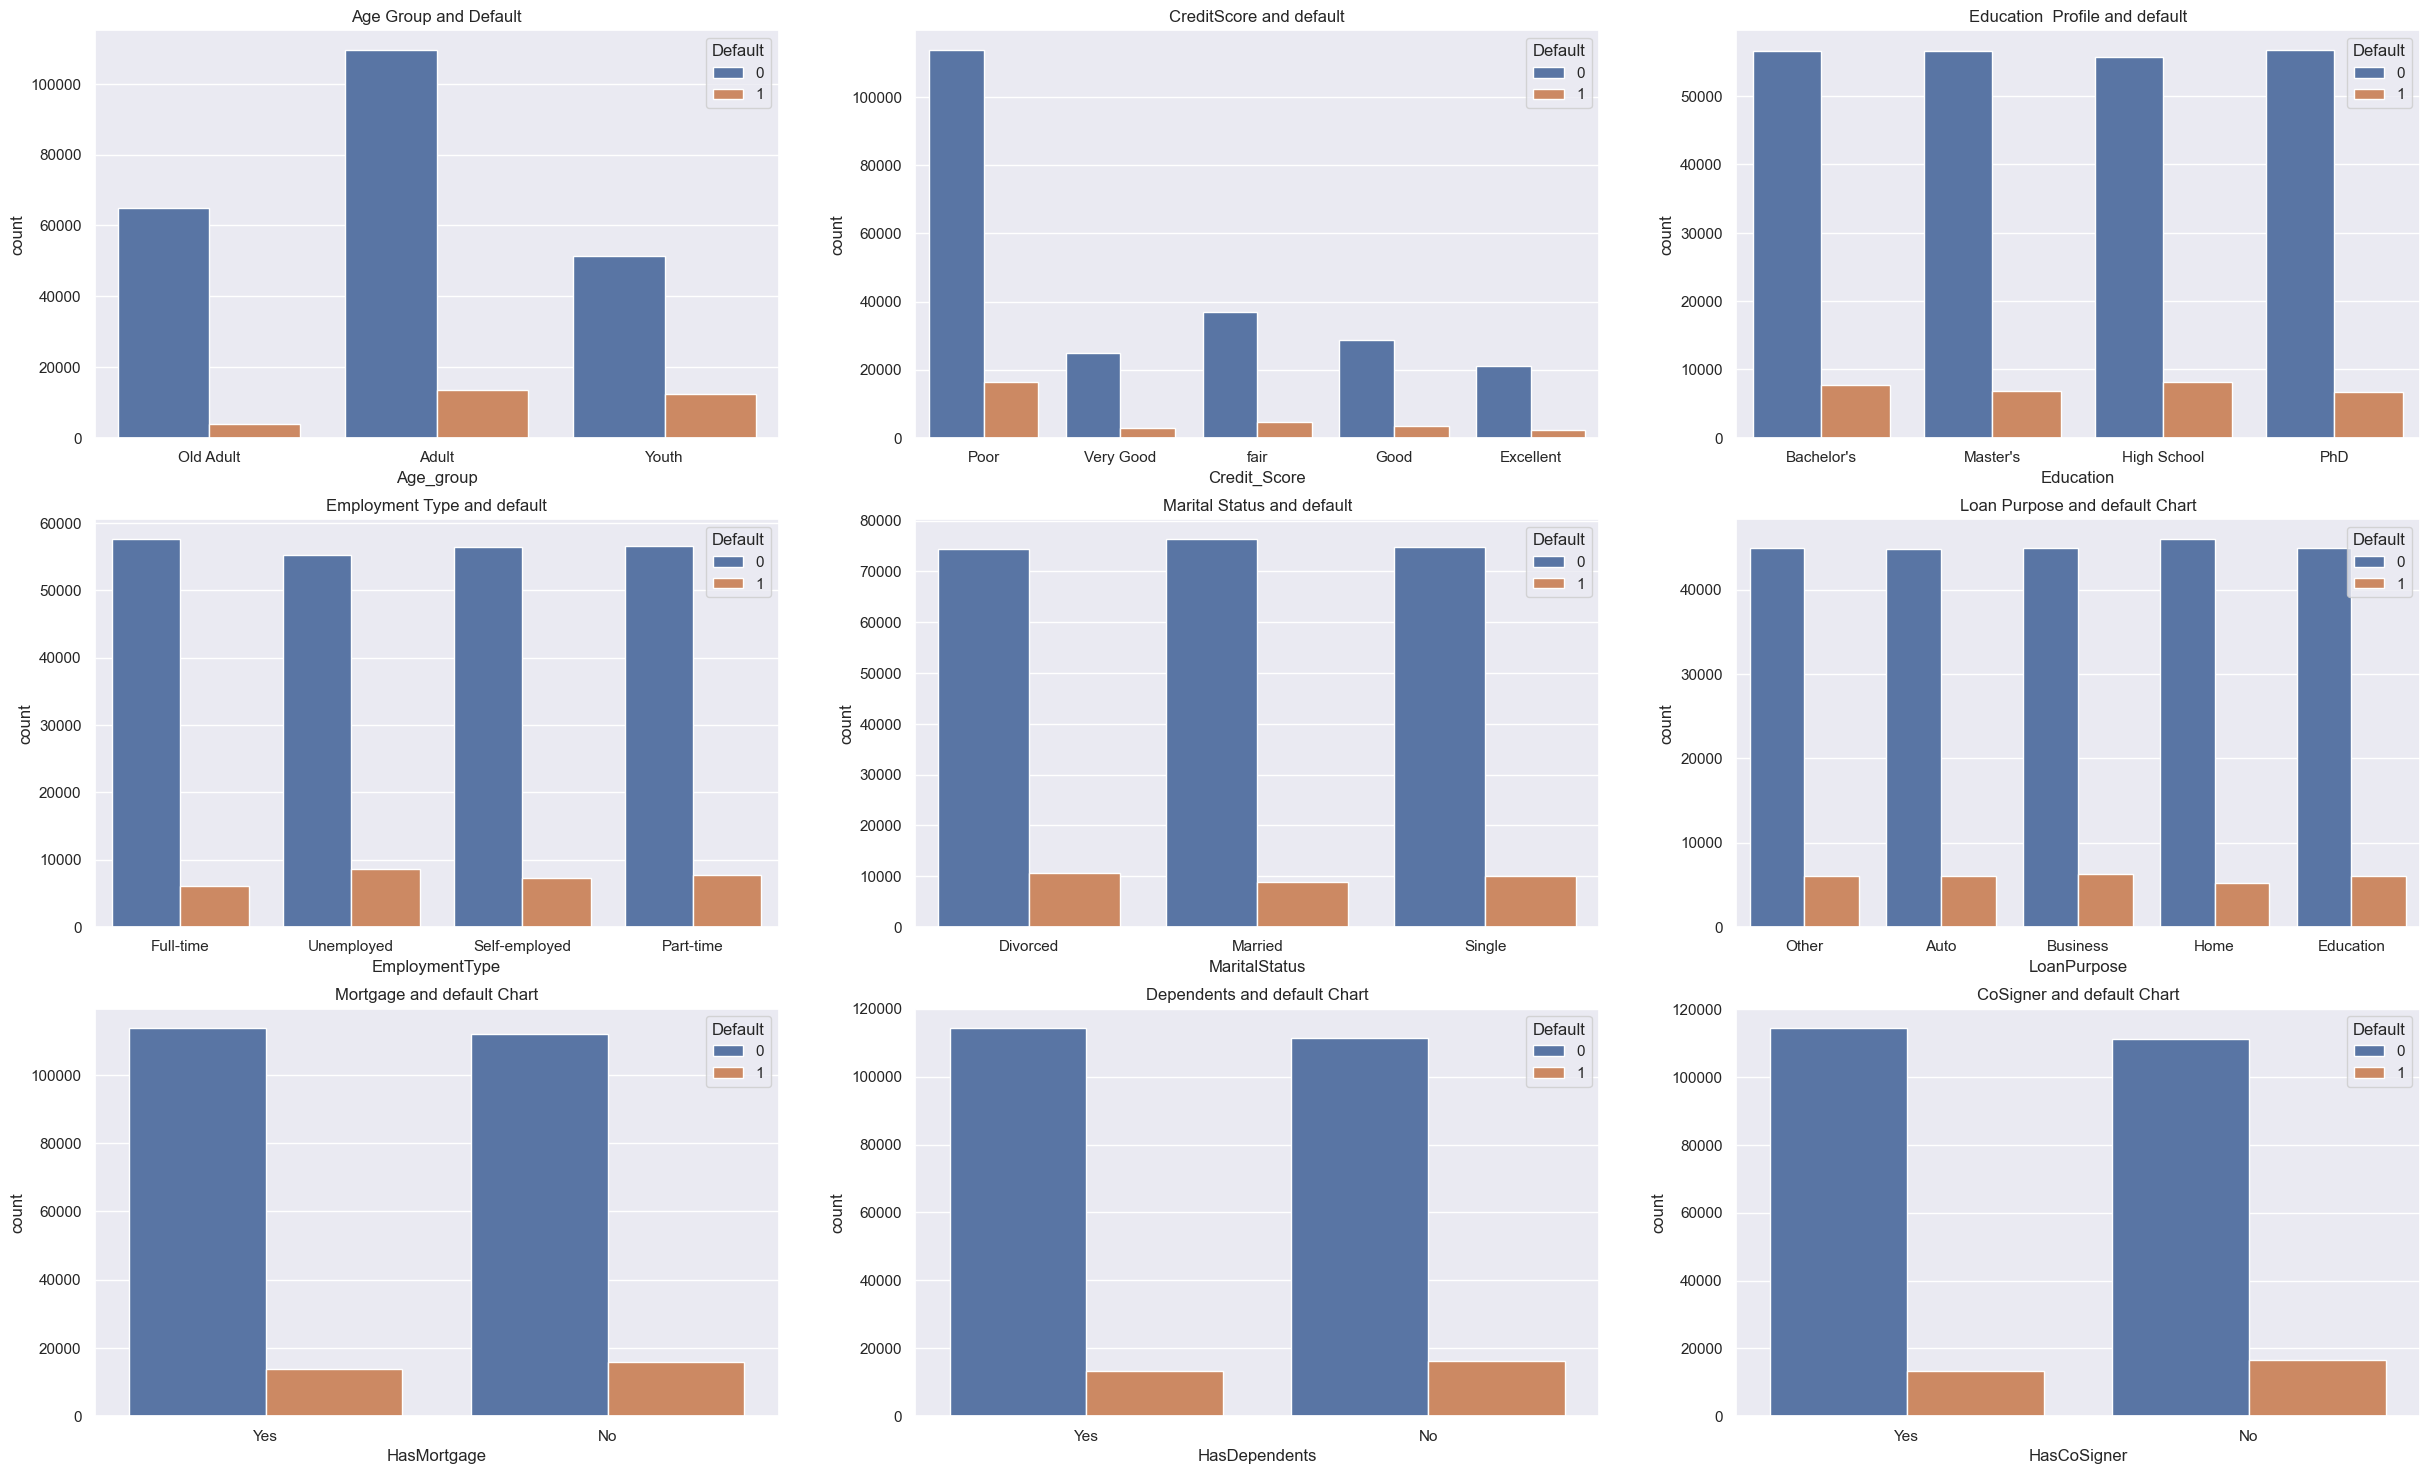

In [202]:
# Bivariate Analysis - reviewing the features against loan defaults
# Default 0 = No, 1 = Yes
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(30, 18))
sns.countplot(x="Age_group", data = data, hue= "Default", ax=axs[0,0])
axs[0,0].set_title("Age Group and Default")

sns.countplot(x="Credit_Score", data = data, hue= "Default", ax=axs[0,1])
axs[0,1].set_title("CreditScore and default")

sns.countplot(x="Education", data = data, hue= "Default", ax=axs[0,2])
axs[0,2].set_title("Education  Profile and default")

sns.countplot(x="EmploymentType", data = data, hue= "Default", ax=axs[1,0])
axs[1,0].set_title("Employment Type and default")

sns.countplot(x="MaritalStatus", data = data, hue= "Default", ax=axs[1,1])
axs[1,1].set_title("Marital Status and default")

sns.countplot(x="LoanPurpose", data = data, hue= "Default", ax=axs[1,2])
axs[1,2].set_title("Loan Purpose and default Chart")

sns.countplot(x="HasMortgage", data = data, hue= "Default", ax=axs[2,0])
axs[2,0].set_title("Mortgage and default Chart")

sns.countplot(x="HasDependents", data = data, hue= "Default", ax=axs[2,1])
axs[2,1].set_title("Dependents and default Chart")

sns.countplot(x="HasCoSigner", data = data, hue= "Default", ax=axs[2,2])
axs[2,2].set_title("CoSigner and default Chart");


Default
0    225694
1     29653
Name: count, dtype: int64


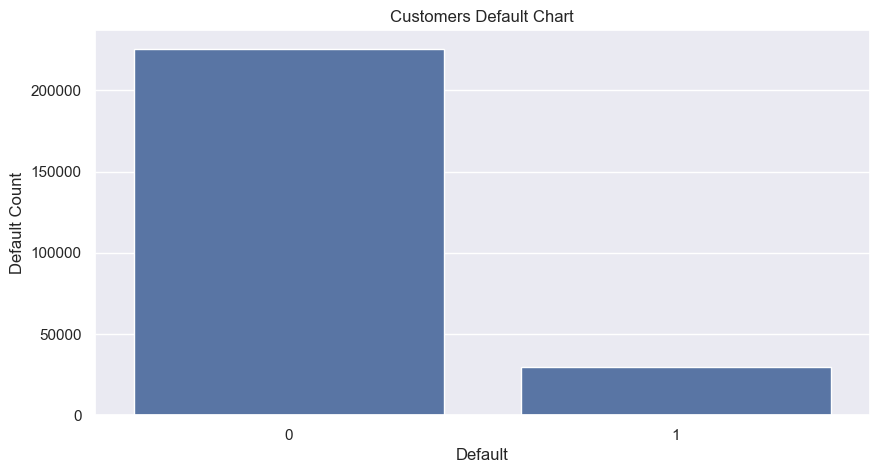

In [206]:
# Target variable distribution
print(data["Default"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x=data["Default"], data = data)
plt.title("Customers Default Chart")
plt.ylabel("Default Count")
plt.xlabel("Default");

We have more customers that did not default in our dataset. This could be seen as a data imbalance while training the model and affect our model.

In [208]:
data.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Age_group,Credit_Score
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,Old Adult,Poor
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,Old Adult,Poor


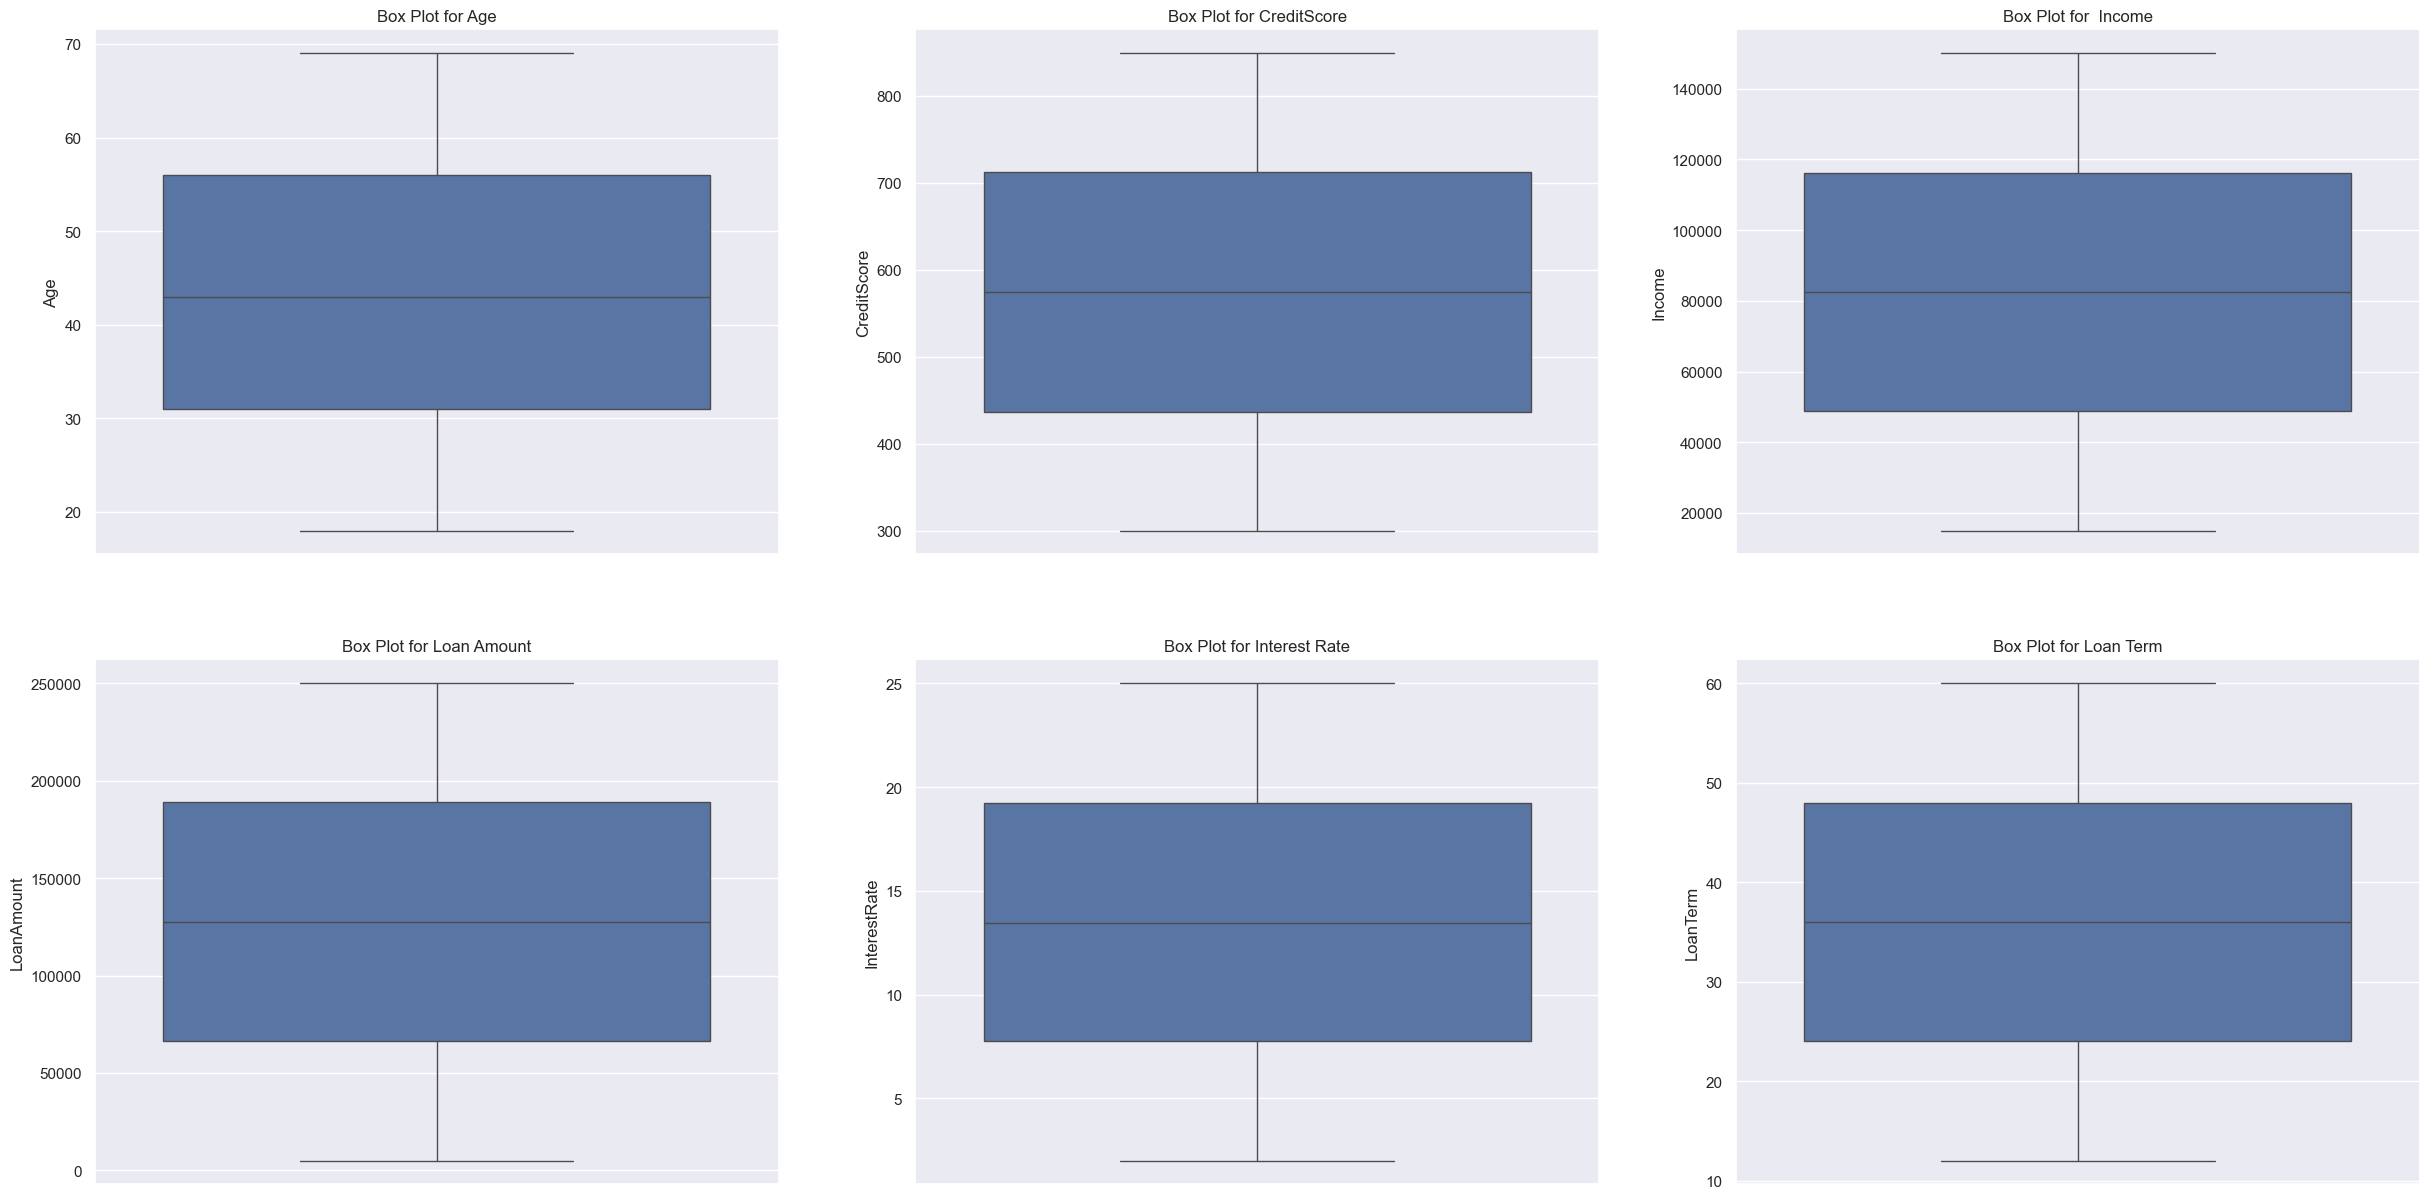

In [209]:
# Checking for outliers
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(30, 15))
sns.boxplot(y="Age", data = data, ax=axs[0,0])
axs[0,0].set_title("Box Plot for Age")

sns.boxplot(y="CreditScore", data = data, ax=axs[0,1])
axs[0,1].set_title("Box Plot for CreditScore")

sns.boxplot(y="Income", data = data, ax=axs[0,2])
axs[0,2].set_title("Box Plot for  Income")

sns.boxplot(y="LoanAmount", data = data, ax=axs[1,0])
axs[1,0].set_title("Box Plot for Loan Amount")

sns.boxplot(y="InterestRate", data = data, ax=axs[1,1])
axs[1,1].set_title("Box Plot for Interest Rate");

sns.boxplot(y="LoanTerm", data = data, ax=axs[1,2])
axs[1,2].set_title("Box Plot for Loan Term");

There are no outliers detected in our data

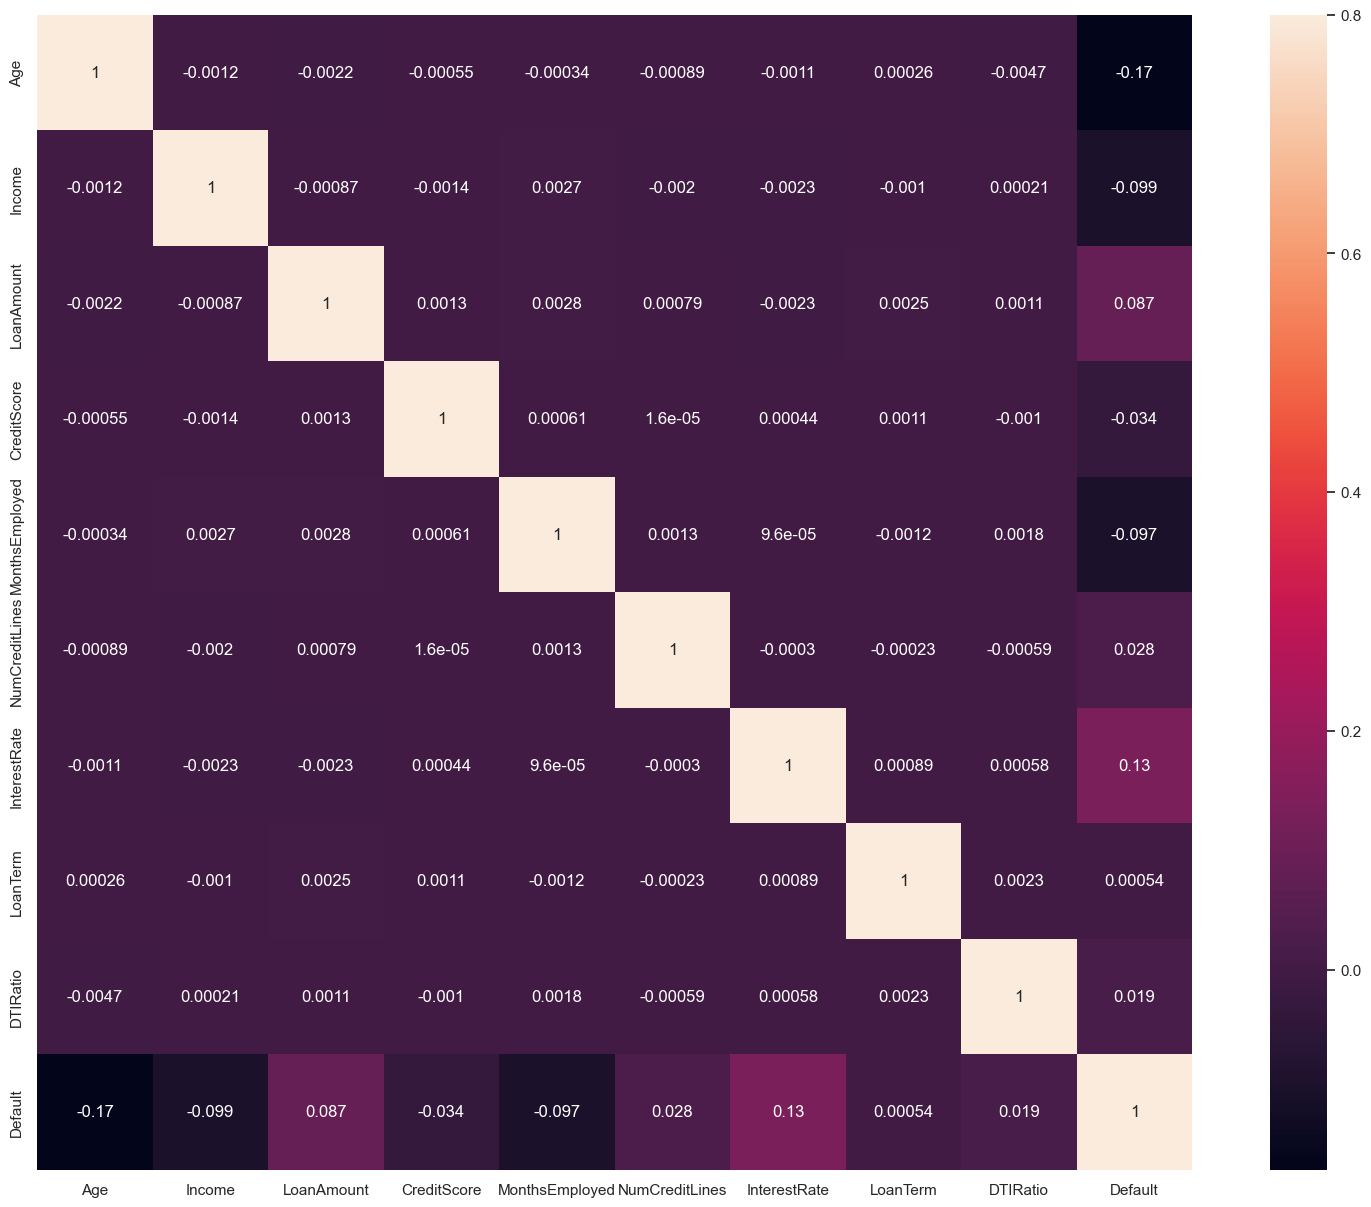

In [211]:
a= data.select_dtypes(include="number")
plt.figure(figsize=(20,15))
sns.heatmap(a.corr(), vmax=0.8, square=True, annot=True);

There are no noticeable strong correlations betwee the features and default.

## Modelling (Loan Default Prediction)
### Data Preprocessing

In [216]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Age_group,Credit_Score
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,Old Adult,Poor
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,Old Adult,Poor
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,Adult,Poor
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,Adult,Very Good
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,Old Adult,fair


In [217]:
#Further dropping additional/extra columns

data = data.drop("Age_group", axis=1)
data = data.drop("Credit_Score", axis=1)

In [218]:
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [219]:
# Encoding the categorical variable
from sklearn.preprocessing import LabelEncoder

In [220]:
encoder = LabelEncoder()
for c in data.columns[0:]:
    if (data[c].dtypes=='object'):
        data[c] = encoder.fit_transform(data[c])
    else: 
        data[c] = data[c]

data.head()
    

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


IndexError: index 12 is out of bounds for axis 0 with size 12

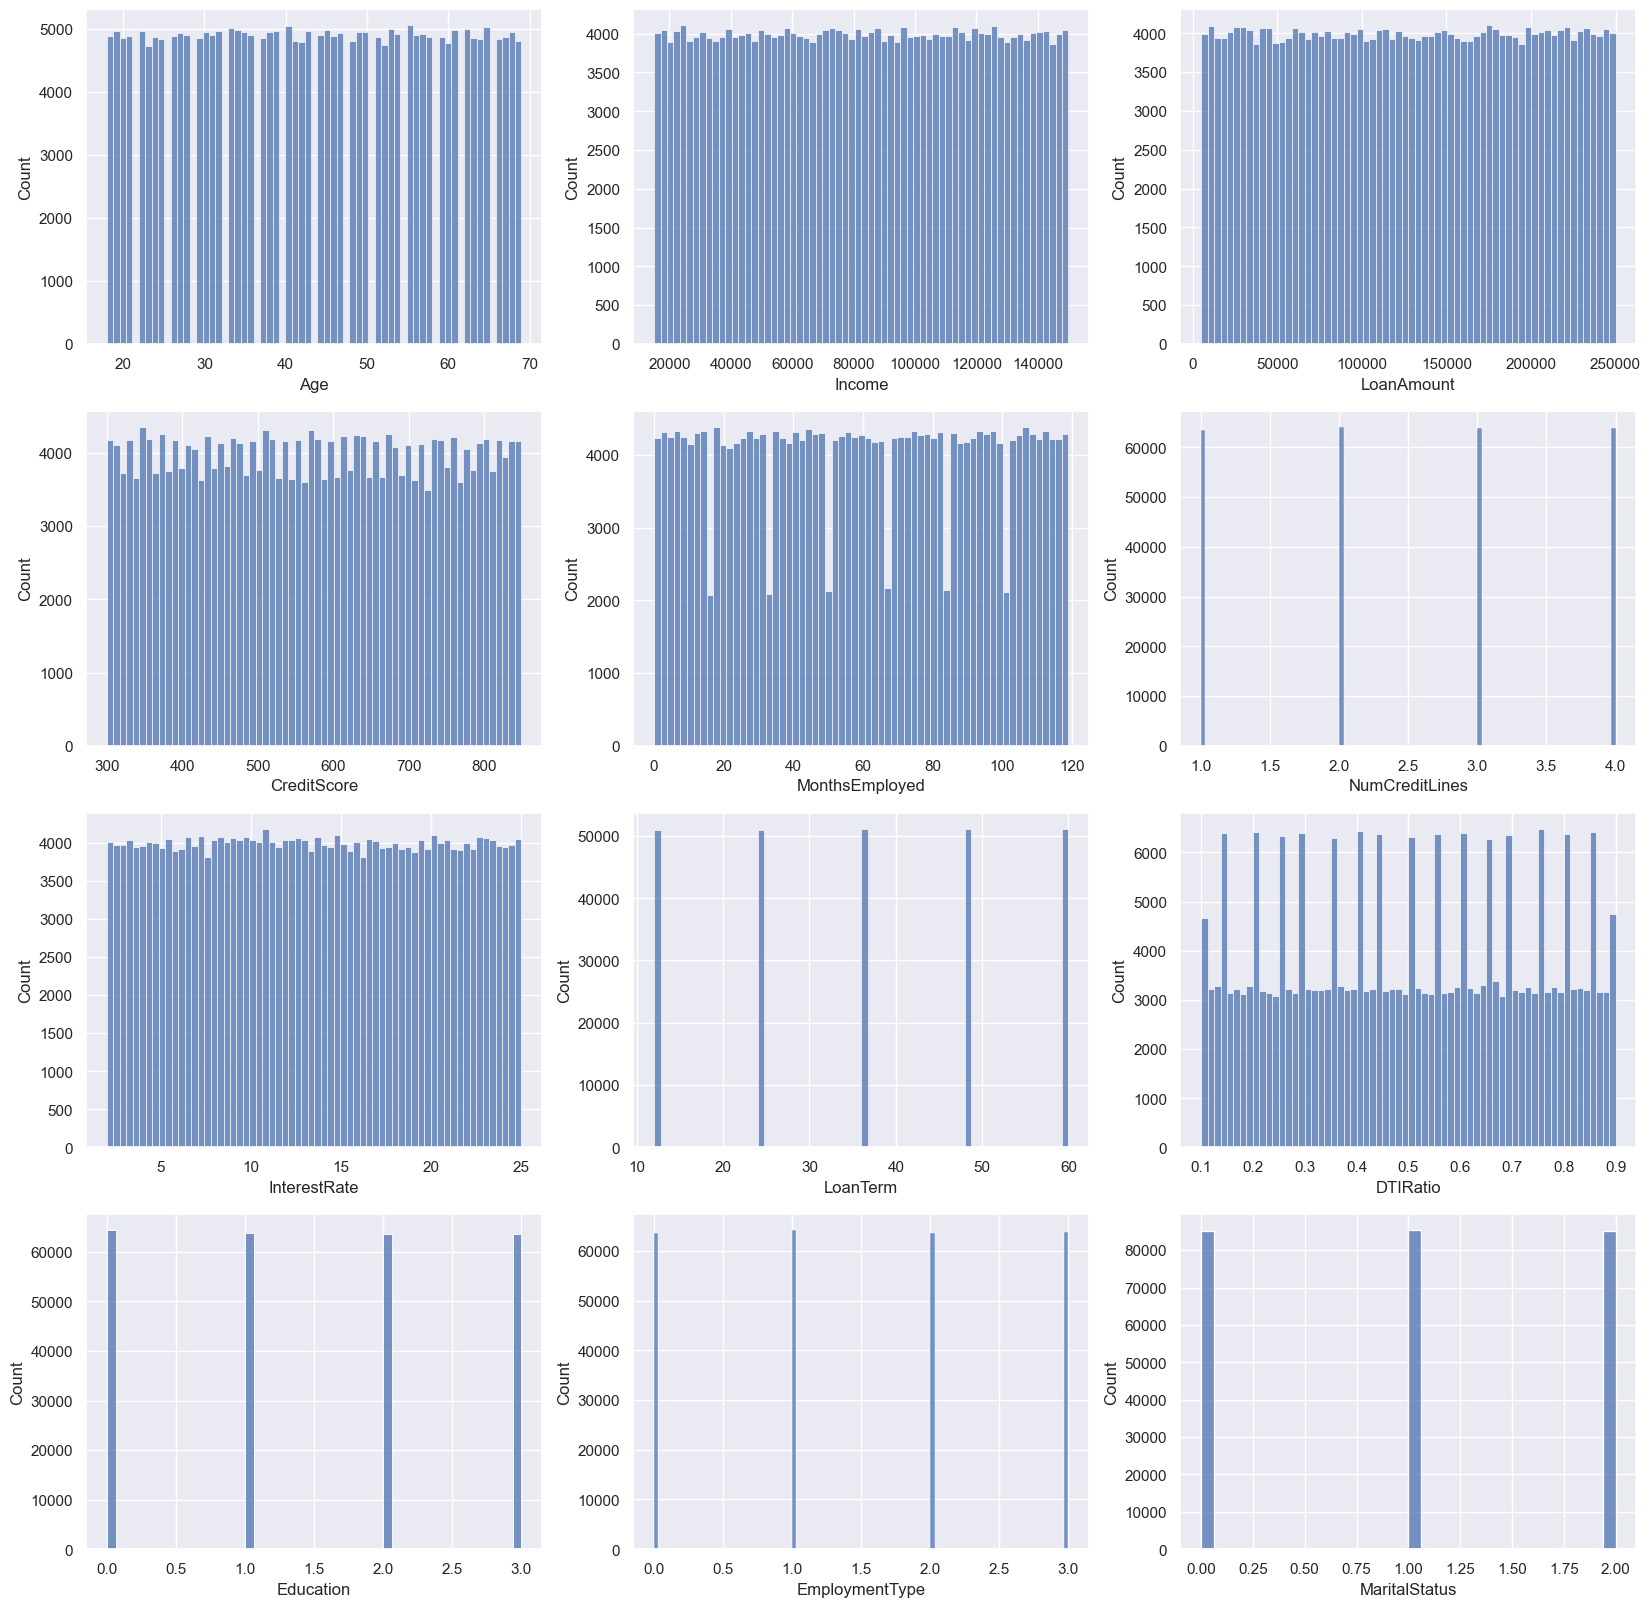

In [221]:
#Knowing that out target variable - "Default" is imbalanced and will affect the prediction, investigating the data distribution of the numerical columns
fig, position = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(data.select_dtypes(include="number")):
    sns.histplot(data[column_name], ax=position[index])

plt.tight_layout()
plt.show();

The data is mostly uniformly distributed. Hence, we'll use Min-MaxScaler.

If the distribution is normal or slightly skewed, we'll use a StandardScaler.

If its heavily skewed we will consider a RobustScaler

In [222]:
data.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0


In [256]:
data.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

In [284]:
# Separating the default from other features
label = data["Default"]
label

0         0
1         0
2         1
3         0
4         0
         ..
255342    0
255343    1
255344    0
255345    0
255346    0
Name: Default, Length: 255347, dtype: int64

In [286]:
feature = data.drop("Default", axis =1)
feature

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0.745098,0.745098,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,1.000000,1.000000,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,0.549020,0.549020,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0.274510,0.274510,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0.823529,0.823529,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0.019608,0.019608,1,0,0,4,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,0.274510,0.274510,0,0,0,3,0
255344,56,84820,208294,597,70,3,5.29,60,0.50,0.745098,0.745098,1,1,1,0,1
255345,42,85109,60575,809,40,1,20.90,48,0.44,0.470588,0.470588,2,1,1,4,0


In [288]:
# Splitting the data into test and train. Features = X, Label = y

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=42)

In [290]:
X_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
137187,18,137576,209136,846,26,2,10.47,60,0.81,0.000000,0.000000,2,1,0,1,0
230334,47,57194,5970,748,30,2,19.72,36,0.73,0.568627,0.568627,0,0,1,2,0
19687,26,84328,95065,453,7,2,24.25,12,0.45,0.156863,0.156863,1,0,0,4,1
106509,53,49795,229582,533,107,3,14.44,60,0.17,0.686275,0.686275,2,1,0,0,1
242291,49,115450,22072,840,0,4,24.48,12,0.11,0.607843,0.607843,2,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,40,116623,161673,651,79,2,23.44,12,0.87,0.431373,0.431373,0,0,0,3,1
103694,67,62958,189499,460,77,3,9.29,36,0.11,0.960784,0.960784,2,0,0,1,1
131932,62,34372,59645,524,94,3,9.72,60,0.24,0.862745,0.862745,2,1,0,0,0
146867,44,146262,198454,489,7,4,4.31,48,0.30,0.509804,0.509804,1,1,0,3,0


In [294]:
#using the MinMaxScaler to scale our data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [296]:
X_train_scaled

array([[0.        , 0.9079771 , 0.83321088, ..., 0.        , 0.25      ,
        0.        ],
       [0.56862745, 0.31255046, 0.00395513, ..., 1.        , 0.5       ,
        0.        ],
       [0.15686275, 0.51354454, 0.36761116, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.8627451 , 0.14349736, 0.22303856, ..., 0.        , 0.        ,
        0.        ],
       [0.50980392, 0.97231831, 0.78961053, ..., 0.        , 0.75      ,
        0.        ],
       [0.35294118, 0.6136638 , 0.74936122, ..., 0.        , 0.75      ,
        0.        ]])

In [298]:
X_test_scaled

array([[0.7254902 , 0.72340993, 0.35672651, ..., 1.        , 0.75      ,
        0.        ],
       [0.74509804, 0.56720299, 0.51666218, ..., 1.        , 0.5       ,
        1.        ],
       [0.15686275, 0.46793932, 0.28743275, ..., 1.        , 0.5       ,
        1.        ],
       ...,
       [0.96078431, 0.5445205 , 0.56193415, ..., 0.        , 0.5       ,
        0.        ],
       [0.47058824, 0.75298902, 0.75897398, ..., 1.        , 1.        ,
        1.        ],
       [0.60784314, 0.5586915 , 0.3222878 , ..., 0.        , 0.5       ,
        0.        ]])

## Model Training

In [300]:
# Initialize, Fit and Predict 

In [304]:
#model = LogisticRegression(randmstate=42)

In [306]:
# Model Training: 
# model.fit(X_train, y_train)
#Model Prediction
# Model.predict(X_test)
# Model Evaluation
# Model Evaluation
# report = classification_report(y_test, predictions, digits=5)
# Confusion Matrix
# matrix = confusion_matrix(y_test, predictions)

In [308]:
# In cases as this with imbalanced dataset, we can not depend on accuracy alone, we need to review the f1score, prediction and recall to determine 
# the optimal performing model

In [310]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# !pip install xgboost
from xgboost import XGBClassifier

classifiers = [[XGBClassifier(), "XGB Classifier"],
                [RandomForestClassifier(), "Random Forest"],
                [KNeighborsClassifier(), "k-Nearest Neighbors"],
                [DecisionTreeClassifier(), "Decision Tree"],
                [LogisticRegression(), "Logistic Regression"],
                [SGDClassifier(), 'SGD Classifiers'],
                [GradientBoostingClassifier(), 'Gradient Boosting'],
                [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]

In [312]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

acc_list={}
precision_list={}
recall_list={}
roc_list={}

# for loop
for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
   
    #test
    pred = model.predict(X_test)
   
    # Assessing
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
   
    #converting into percentages
    acc_list[model_name] = ([str(round(a_score*100, 2))+ '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2))+ '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2))+ '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2))+ '%'])
   
    if model_name != classifiers[-1][1]:
        print('')

C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<-- XGB Classifier -->

Classification Report:
              precision    recall  f1-score       support
0              0.891608  0.991388  0.938854  45170.000000
1              0.539645  0.077288  0.135211   5900.000000
accuracy       0.885784  0.885784  0.885784      0.885784
macro avg      0.715626  0.534338  0.537033  51070.000000
weighted avg   0.850946  0.885784  0.846011  51070.000000


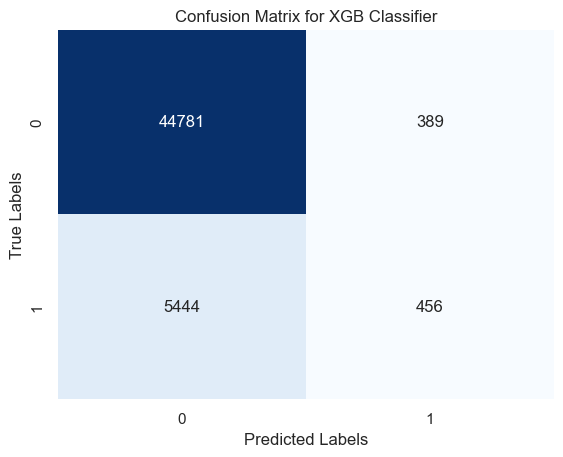

<-- Random Forest -->

Classification Report:
              precision    recall  f1-score       support
0              0.889331  0.995550  0.939447  45170.000000
1              0.601980  0.051525  0.094926   5900.000000
accuracy       0.886489  0.886489  0.886489      0.886489
macro avg      0.745655  0.523538  0.517187  51070.000000
weighted avg   0.856134  0.886489  0.841882  51070.000000


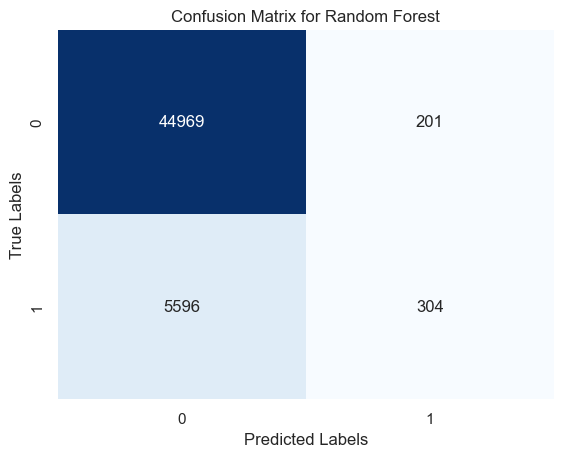

<-- k-Nearest Neighbors -->

Classification Report:
              precision    recall  f1-score       support
0              0.887453  0.980894  0.931837  45170.000000
1              0.245629  0.047627  0.079784   5900.000000
accuracy       0.873076  0.873076  0.873076      0.873076
macro avg      0.566541  0.514261  0.505811  51070.000000
weighted avg   0.813305  0.873076  0.833402  51070.000000


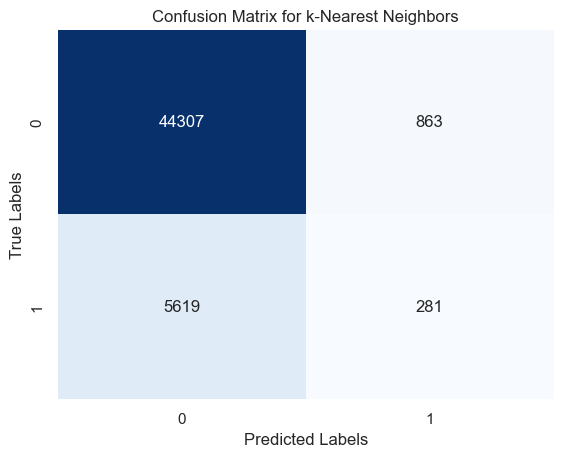

<-- Decision Tree -->

Classification Report:
              precision    recall  f1-score       support
0              0.897318  0.875625  0.886339  45170.000000
1              0.196510  0.232881  0.213155   5900.000000
accuracy       0.801371  0.801371  0.801371      0.801371
macro avg      0.546914  0.554253  0.549747  51070.000000
weighted avg   0.816356  0.801371  0.808568  51070.000000


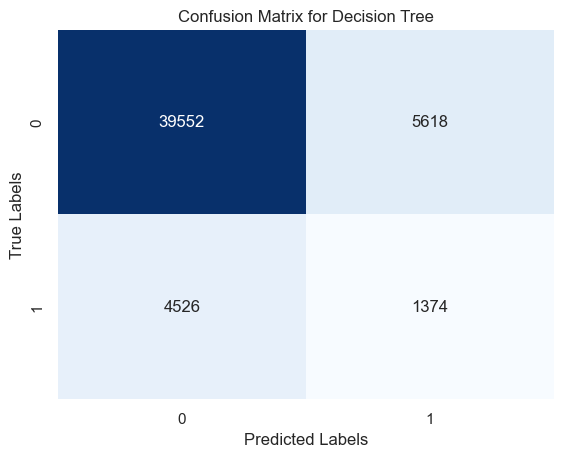

<-- Logistic Regression -->


C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report:
              precision    recall  f1-score       support
0              0.885513  0.999314  0.938978  45170.000000
1              0.673684  0.010847  0.021351   5900.000000
accuracy       0.885118  0.885118  0.885118      0.885118
macro avg      0.779598  0.505081  0.480164  51070.000000
weighted avg   0.861040  0.885118  0.832966  51070.000000


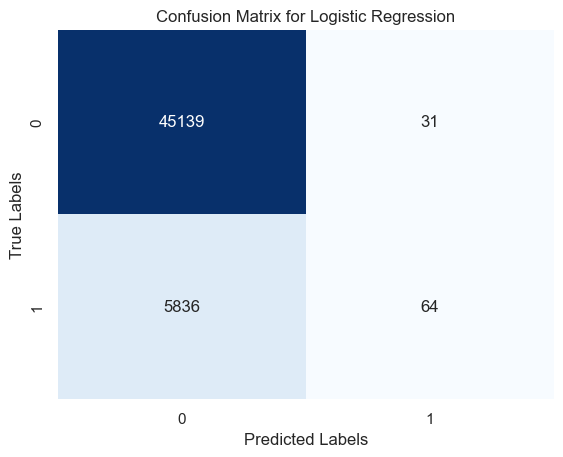

<-- SGD Classifiers -->

Classification Report:
              precision    recall  f1-score       support
0              0.916043  0.734802  0.815474  45170.000000
1              0.192627  0.484407  0.275643   5900.000000
accuracy       0.705874  0.705874  0.705874      0.705874
macro avg      0.554335  0.609604  0.545558  51070.000000
weighted avg   0.832469  0.705874  0.753108  51070.000000


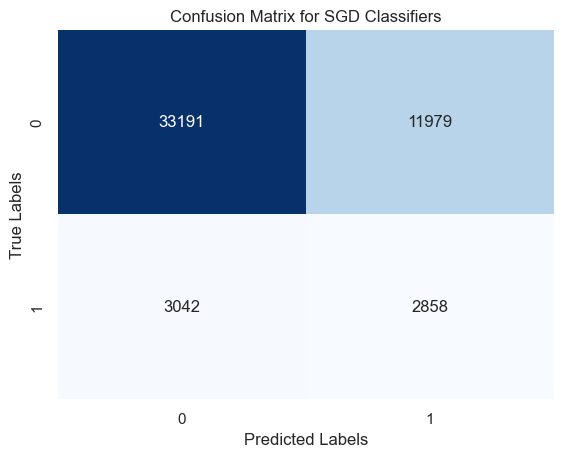

<-- Gradient Boosting -->

Classification Report:
              precision    recall  f1-score       support
0              0.889715  0.996414  0.940046  45170.000000
1              0.664596  0.054407  0.100580   5900.000000
accuracy       0.887586  0.887586  0.887586      0.887586
macro avg      0.777156  0.525410  0.520313  51070.000000
weighted avg   0.863707  0.887586  0.843065  51070.000000


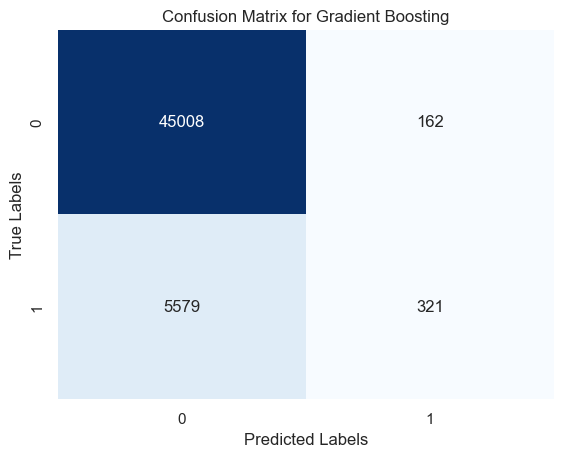

<-- XGBoost -->

Classification Report:
              precision    recall  f1-score       support
0              0.891608  0.991388  0.938854  45170.000000
1              0.539645  0.077288  0.135211   5900.000000
accuracy       0.885784  0.885784  0.885784      0.885784
macro avg      0.715626  0.534338  0.537033  51070.000000
weighted avg   0.850946  0.885784  0.846011  51070.000000


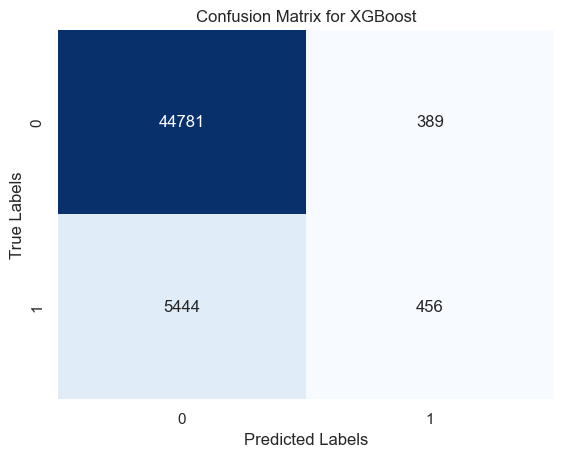


Model Performance Table:
XGB Classifier Random Forest k-Nearest Neighbors Decision Tree Logistic Regression SGD Classifiers Gradient Boosting XGBoost
         88.6%         88.6%               87.3%         80.1%               88.5%           70.6%             88.8%   88.6%


In [314]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a dictionary to store results
results = {}

# Loop through classifiers
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    
    # Fit the model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Store the accuracy in the results dictionary
    results[model_name] = [f"{accuracy * 100:.1f}%"]
    
    # Generate classification report
    report = classification_report(y_test, predictions, output_dict=True)  # Convert to dict
    report_df = pd.DataFrame(report).transpose()  # Convert dict to DataFrame
    print("\nClassification Report:")
    print(report_df)  # Print the tabulated classification report
    
    # Generate confusion matrix
    matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(matrix, annot=True, fmt='g', cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the table in the desired format
print("\nModel Performance Table:")
print(results_df.to_string(index=False))

The SGD classifier model performed a lot better however the general performance of the model is poor accross all applied ML algorithm. 

This may be due to a class imbalance in the data as we noticed earlier that the majority of the target variable("Default") data has more people not defaulting than those defaulting in their loans.

In trying to fix this class imbalance we'll manually assign some class weight/importance to our weak class (class: 1).

              precision    recall  f1-score   support

           0    0.91511   0.88583   0.90023     45170
           1    0.29789   0.37085   0.33039      5900

    accuracy                        0.82634     51070
   macro avg    0.60650   0.62834   0.61531     51070
weighted avg    0.84380   0.82634   0.83440     51070



C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(47.25, 0.5, 'Actual Value')

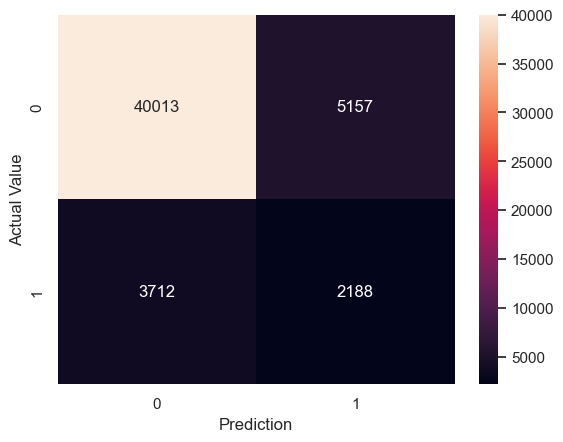

In [318]:
# Trying out the weight balancing on Logistic Regression
# Initialize the model

model = LogisticRegression(random_state=42, class_weight={0:1, 1:4})

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Model Evaluation
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)

print(report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.xlabel("Prediction")
plt.ylabel("Actual Value")

We can see that the Logistic regression did a lot better than the previous on the new added weight, we need to confirm with other models too

<-- Logistic Regression -->


C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90     45170
           1       0.30      0.37      0.33      5900

    accuracy                           0.83     51070
   macro avg       0.61      0.63      0.62     51070
weighted avg       0.84      0.83      0.83     51070



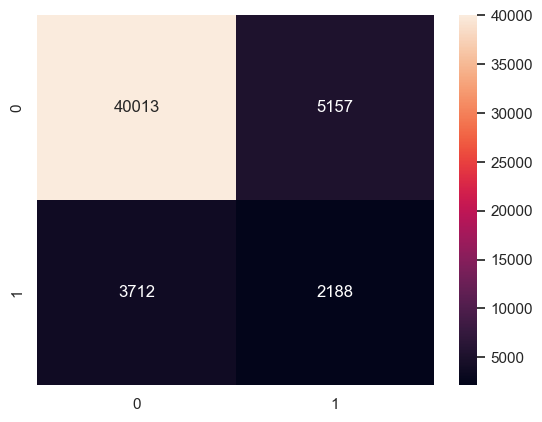

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.43      0.58     45170
           1       0.14      0.73      0.24      5900

    accuracy                           0.46     51070
   macro avg       0.53      0.58      0.41     51070
weighted avg       0.83      0.46      0.54     51070



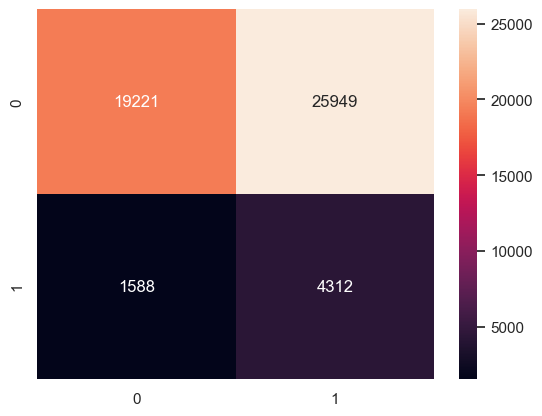

<-- k-Nearest Neighbors -->
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     45170
           1       0.25      0.05      0.08      5900

    accuracy                           0.87     51070
   macro avg       0.57      0.51      0.51     51070
weighted avg       0.81      0.87      0.83     51070



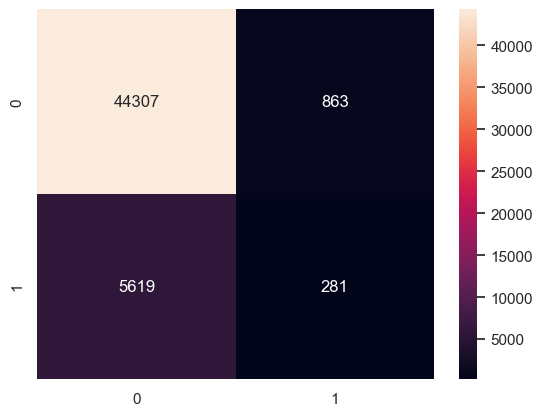

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     45170
           1       0.19      0.20      0.20      5900

    accuracy                           0.81     51070
   macro avg       0.54      0.54      0.54     51070
weighted avg       0.81      0.81      0.81     51070



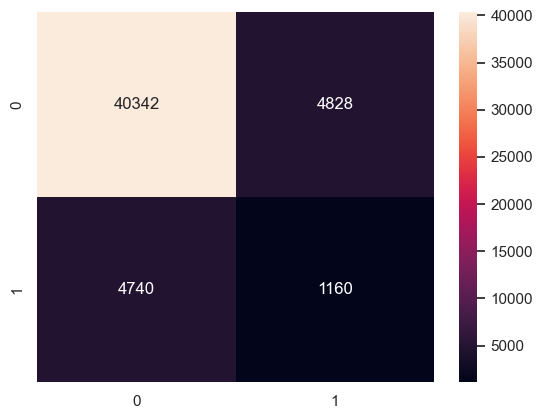

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.60      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.50     51070
weighted avg       0.85      0.89      0.84     51070



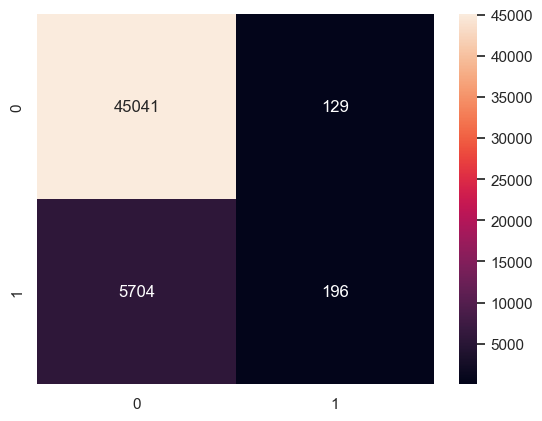

<-- Gradient Boosting -->
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.66      0.05      0.10      5900

    accuracy                           0.89     51070
   macro avg       0.78      0.53      0.52     51070
weighted avg       0.86      0.89      0.84     51070



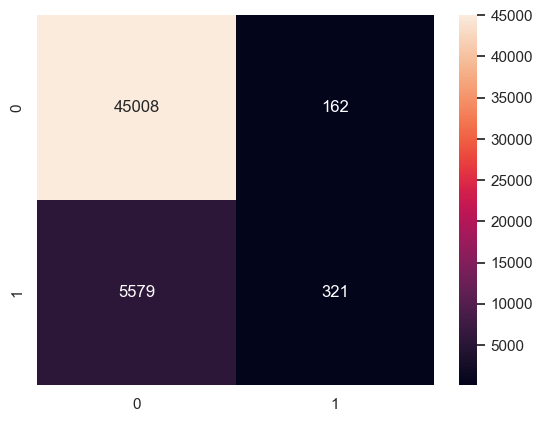

<-- AdaBoost -->
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.57      0.04      0.07      5900

    accuracy                           0.89     51070
   macro avg       0.73      0.52      0.51     51070
weighted avg       0.85      0.89      0.84     51070



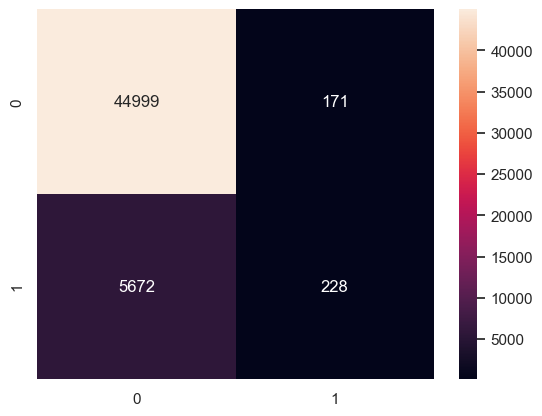

<-- XGBoost -->
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.54      0.08      0.14      5900

    accuracy                           0.89     51070
   macro avg       0.72      0.53      0.54     51070
weighted avg       0.85      0.89      0.85     51070



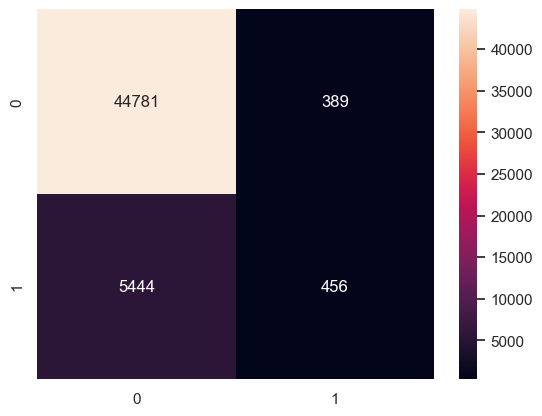

In [321]:
# Confirming the performance of other models

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

class_weights = {0: 1, 1: 4} 

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
     # [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
    [KNeighborsClassifier(), 'k-Nearest Neighbors'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

The SGD classifier also had the most improved performance. 

We need to balance the minority class with the majority class by oversampling the minority class to balance with the majority class.

In [323]:
from imblearn.over_sampling import SMOTE

In [325]:
# Separate features and target
X = data.drop('Default', axis=1)
y = data['Default']

In [327]:
# Initialize the scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(feature)

In [329]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [331]:
y_resampled.value_counts()

Default
0    225694
1    225694
Name: count, dtype: int64

In [333]:
y_resampled.value_counts(normalize=True)*100

Default
0    50.0
1    50.0
Name: proportion, dtype: float64

In [ ]:
sns.countplot(x=y_resampled)

In [335]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [337]:
from datetime import datetime

===============Logistic Regression===============
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68     45127
           1       0.68      0.70      0.69     45151

    accuracy                           0.69     90278
   macro avg       0.69      0.69      0.69     90278
weighted avg       0.69      0.69      0.69     90278



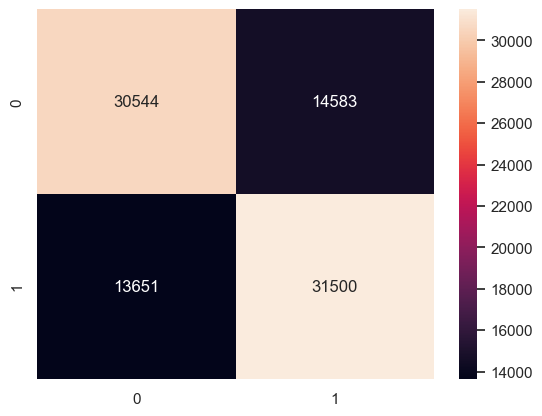

===============Took: 1 seconds to train===============
===============SGD Classifiers===============
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.65      0.67     45127
           1       0.67      0.72      0.70     45151

    accuracy                           0.69     90278
   macro avg       0.69      0.69      0.69     90278
weighted avg       0.69      0.69      0.69     90278



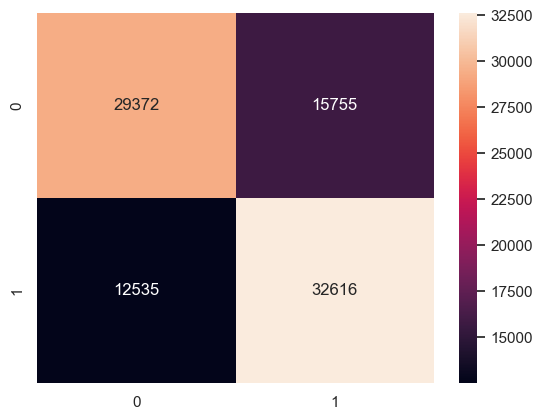

===============Took: 2 seconds to train===============
===============k-Nearest Neighbors===============
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.67      0.80     45127
           1       0.75      1.00      0.86     45151

    accuracy                           0.83     90278
   macro avg       0.87      0.83      0.83     90278
weighted avg       0.87      0.83      0.83     90278



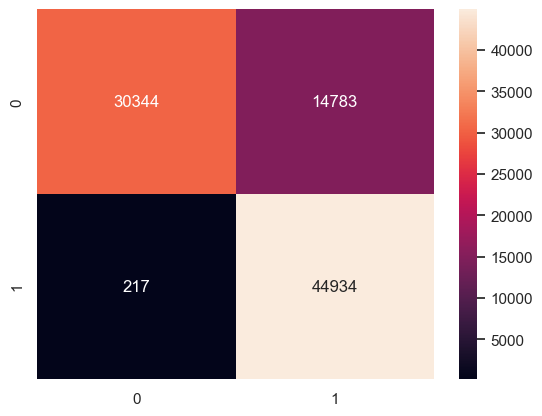

===============Took: 71 seconds to train===============
===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85     45127
           1       0.84      0.86      0.85     45151

    accuracy                           0.85     90278
   macro avg       0.85      0.85      0.85     90278
weighted avg       0.85      0.85      0.85     90278



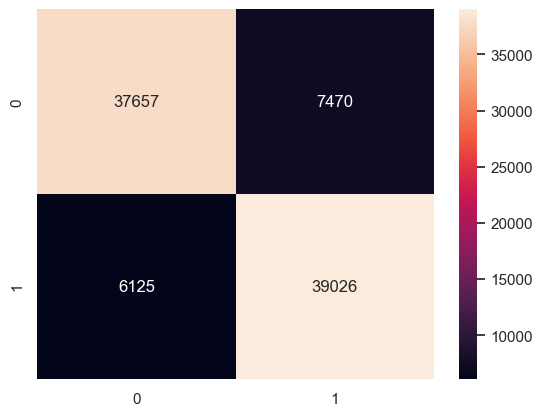

===============Took: 48 seconds to train===============
===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     45127
           1       0.96      0.90      0.93     45151

    accuracy                           0.93     90278
   macro avg       0.93      0.93      0.93     90278
weighted avg       0.93      0.93      0.93     90278



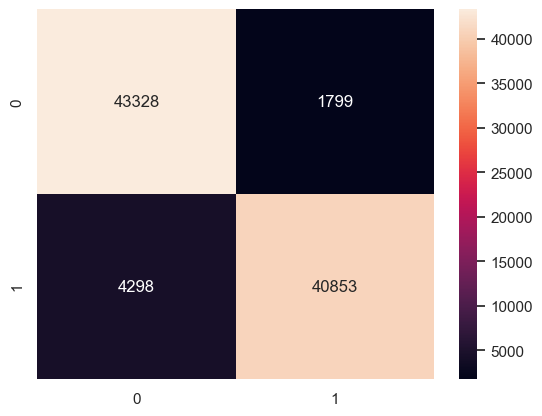

===============Took: 589 seconds to train===============
===============Gradient Boosting===============
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87     45127
           1       0.90      0.82      0.86     45151

    accuracy                           0.86     90278
   macro avg       0.86      0.86      0.86     90278
weighted avg       0.86      0.86      0.86     90278



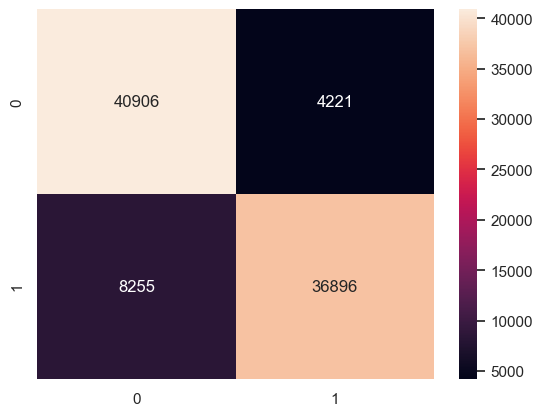

===============Took: 683 seconds to train===============
===============AdaBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73     45127
           1       0.73      0.77      0.75     45151

    accuracy                           0.74     90278
   macro avg       0.74      0.74      0.74     90278
weighted avg       0.74      0.74      0.74     90278



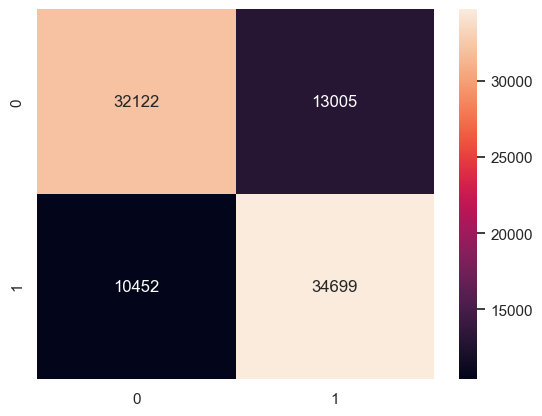

===============Took: 156 seconds to train===============
===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     45127
           1       0.98      0.85      0.91     45151

    accuracy                           0.92     90278
   macro avg       0.92      0.92      0.92     90278
weighted avg       0.92      0.92      0.92     90278



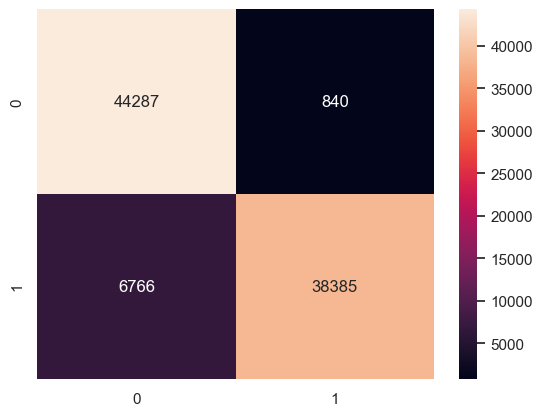

===============Took: 5 seconds to train===============


In [386]:
class_weights = "balanced"

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    # [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
    [KNeighborsClassifier(), 'k-Nearest Neighbors'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    begin = datetime.now()
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()
    end = datetime.now()
    timetaken = end-begin
    print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15)

Kneighbour and Random forest did a lot better

Sliming down the model size by selecting the most IMPORTANT features and train with them ?
## Feature Importance Ranking and Feature Selection

In [341]:
classifiers

[[LogisticRegression(class_weight='balanced', random_state=42),
  'Logistic Regression'],
 [SGDClassifier(class_weight='balanced', random_state=42), 'SGD Classifiers'],
 [KNeighborsClassifier(), 'k-Nearest Neighbors'],
 [DecisionTreeClassifier(class_weight='balanced', random_state=42),
  'Decision Tree'],
 [RandomForestClassifier(class_weight='balanced', random_state=42),
  'Random Forest'],
 [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
 [AdaBoostClassifier(algorithm='SAMME', random_state=42), 'AdaBoost'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='mlogloss',
                feature_types=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_t

In [344]:
classifiers[4]

[RandomForestClassifier(class_weight='balanced', random_state=42),
 'Random Forest']

In [346]:
classifiers[4][0].feature_importances_

array([0.10397716, 0.07836974, 0.07503032, 0.05818752, 0.0762687 ,
       0.05830177, 0.09615098, 0.06526187, 0.05649117, 0.11332598,
       0.10953127, 0.01888876, 0.00973643, 0.01024672, 0.05982312,
       0.01040848])

In [348]:
feature.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0.745098,0.745098,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,1.000000,1.000000,1,0,0,4,1


In [352]:
# Feature importance for Random Forest
importances = classifiers[4][0].feature_importances_
importances

array([0.10397716, 0.07836974, 0.07503032, 0.05818752, 0.0762687 ,
       0.05830177, 0.09615098, 0.06526187, 0.05649117, 0.11332598,
       0.10953127, 0.01888876, 0.00973643, 0.01024672, 0.05982312,
       0.01040848])

In [354]:
feature_names = feature.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

,Feature,Importance
0,Age,0.103977
1,Income,0.078370
2,LoanAmount,0.075030
3,CreditScore,0.058188
4,MonthsEmployed,0.076269
5,NumCreditLines,0.058302
6,InterestRate,0.096151
7,LoanTerm,0.065262
8,DTIRatio,0.056491
9,Education,0.113326


In [356]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
9,Education,0.113326
10,EmploymentType,0.109531
0,Age,0.103977
6,InterestRate,0.096151
1,Income,0.078370
4,MonthsEmployed,0.076269
2,LoanAmount,0.075030
7,LoanTerm,0.065262
14,LoanPurpose,0.059823
5,NumCreditLines,0.058302


<Axes: xlabel='Importance', ylabel='Feature'>

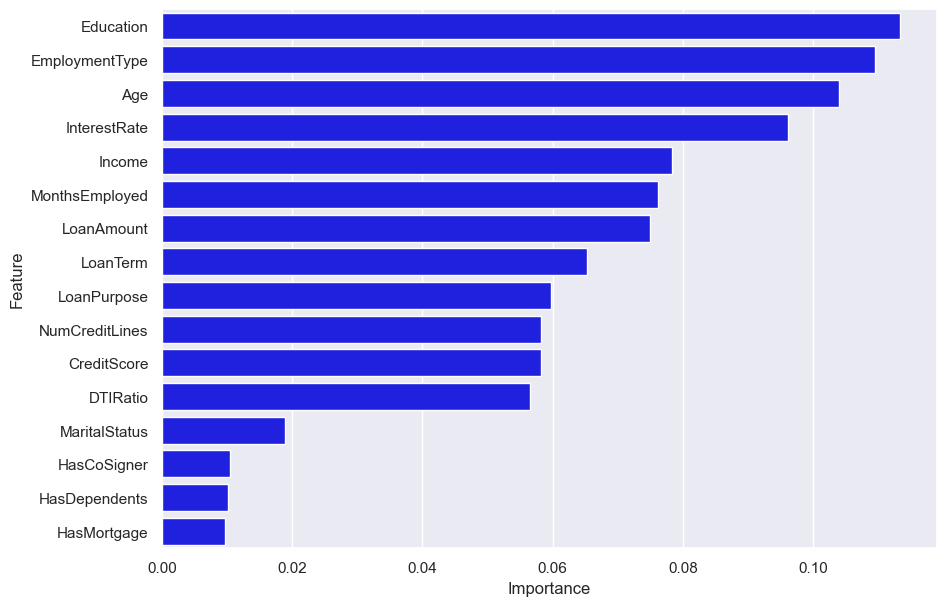

In [358]:
plt.figure(figsize=(10, 7))

sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='blue')

In [ ]:
For Random Classifier, the top feature selection in the model training include: Education, Employment type, Age, Interestrate, income, loan amount etc

In [370]:
#classifiers

[[LogisticRegression(class_weight='balanced', random_state=42),
  'Logistic Regression'],
 [SGDClassifier(class_weight='balanced', random_state=42), 'SGD Classifiers'],
 [KNeighborsClassifier(), 'k-Nearest Neighbors'],
 [DecisionTreeClassifier(class_weight='balanced', random_state=42),
  'Decision Tree'],
 [RandomForestClassifier(class_weight='balanced', random_state=42),
  'Random Forest'],
 [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
 [AdaBoostClassifier(algorithm='SAMME', random_state=42), 'AdaBoost'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='mlogloss',
                feature_types=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_t

In [387]:
#classifiers[2]

[KNeighborsClassifier(), 'k-Nearest Neighbors']

In [390]:
#classifiers[2][0].feature_importances_

In [392]:
# Feature importance for Knearest Neighbour
#importances = classifiers[2][0].feature_importances_
#importances

In [ ]:
#feature_names = feature.columns
#feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
#feature_importance_df

In [ ]:
#feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
#feature_importance_df

In [ ]:
#plt.figure(figsize=(10, 7))

#sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='blue')

## Correlation Analysis

<Axes: >

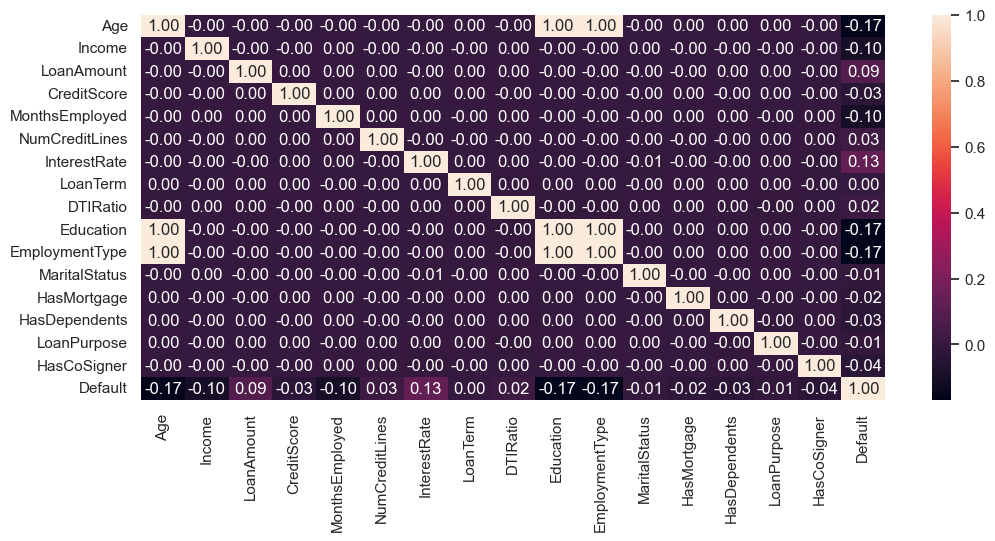

In [395]:
plt.figure(figsize=(12, 5))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f")

## Let's select the top 5 features


In [397]:
X_train.shape

(361110, 16)

In [401]:
Xtrain_top_5 = X_train[:,:5]
Xtest_top_5 = X_test[:,:5]

In [403]:
Xtrain_top_5.shape

(361110, 5)

===============Logistic Regression===============
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.65     45127
           1       0.65      0.67      0.66     45151

    accuracy                           0.66     90278
   macro avg       0.66      0.66      0.66     90278
weighted avg       0.66      0.66      0.66     90278



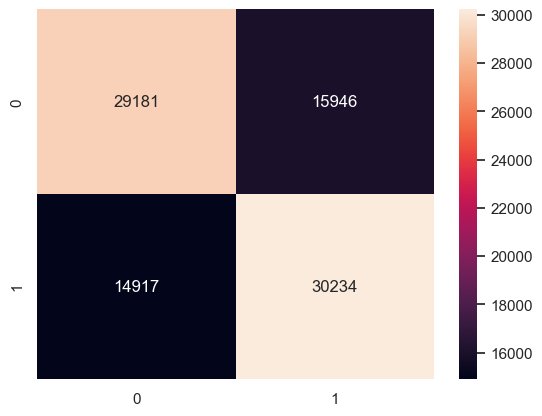

===============Took: 2 seconds to train===============
===============SGD Classifiers===============
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.68      0.66     45127
           1       0.66      0.63      0.65     45151

    accuracy                           0.66     90278
   macro avg       0.66      0.66      0.66     90278
weighted avg       0.66      0.66      0.66     90278



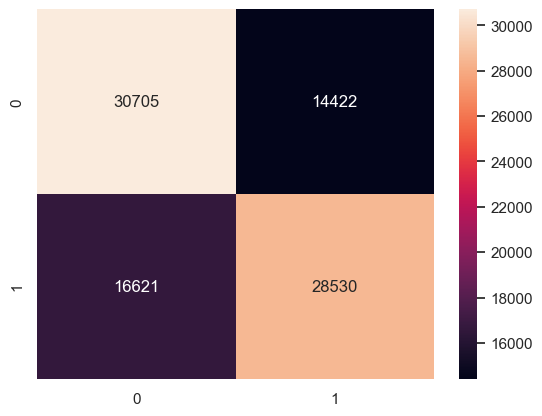

===============Took: 2 seconds to train===============
===============k-Nearest Neighbors===============
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.63      0.69     45127
           1       0.68      0.79      0.73     45151

    accuracy                           0.71     90278
   macro avg       0.71      0.71      0.71     90278
weighted avg       0.71      0.71      0.71     90278



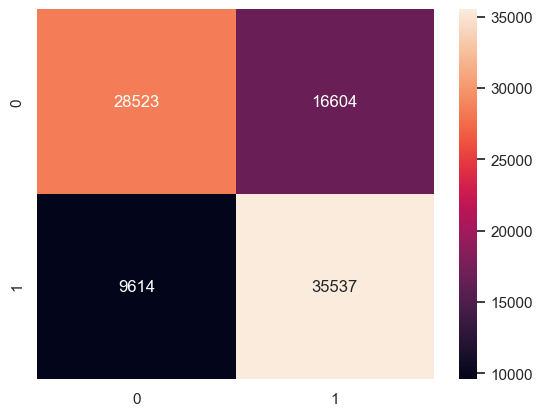

===============Took: 42 seconds to train===============
===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86     45127
           1       0.86      0.87      0.86     45151

    accuracy                           0.86     90278
   macro avg       0.86      0.86      0.86     90278
weighted avg       0.86      0.86      0.86     90278



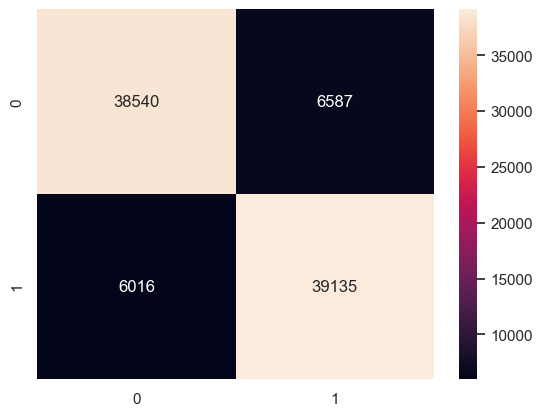

===============Took: 27 seconds to train===============
===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     45127
           1       0.89      0.85      0.87     45151

    accuracy                           0.87     90278
   macro avg       0.88      0.87      0.87     90278
weighted avg       0.88      0.87      0.87     90278



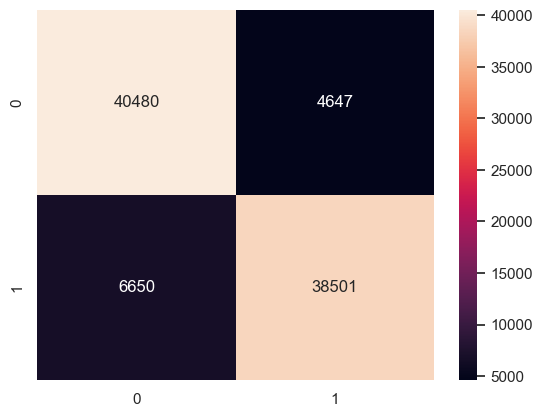

===============Took: 714 seconds to train===============
===============Gradient Boosting===============
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76     45127
           1       0.76      0.75      0.75     45151

    accuracy                           0.75     90278
   macro avg       0.75      0.75      0.75     90278
weighted avg       0.75      0.75      0.75     90278



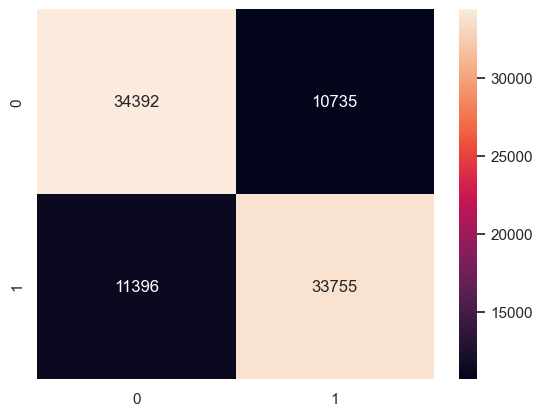

===============Took: 410 seconds to train===============
===============AdaBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66     45127
           1       0.66      0.65      0.66     45151

    accuracy                           0.66     90278
   macro avg       0.66      0.66      0.66     90278
weighted avg       0.66      0.66      0.66     90278



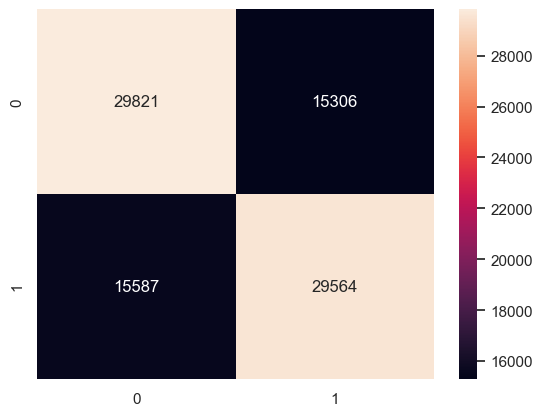

===============Took: 85 seconds to train===============
===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86     45127
           1       0.93      0.76      0.84     45151

    accuracy                           0.85     90278
   macro avg       0.86      0.85      0.85     90278
weighted avg       0.86      0.85      0.85     90278



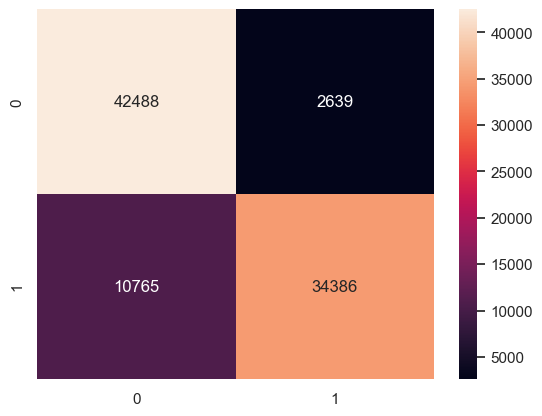

===============Took: 4 seconds to train===============


In [405]:
for classifier in classifiers:
    begin = datetime.now()
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    model.fit(Xtrain_top_5, y_train)
    predictions = model.predict(Xtest_top_5)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()
    end = datetime.now()
    timetaken = end-begin
    print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15)

## Automating the best parameters selection for model Training

Hyper-parameter tuning

In [409]:
from sklearn.model_selection import GridSearchCV

In [411]:
parameter_grid = {
    "max_depth": [20, 30, 50],
    "min_samples_split": [5, 7, 10],
    "class_weight": [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, "balanced"]
}

In [413]:
grid_search = GridSearchCV(estimator=classifiers[4][0], param_grid=parameter_grid, cv=5, scoring="recall")

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

In [ ]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(Xtest_scaled)
report = classification_report(ytest, predictions, digits=5)
matrix = confusion_matrix(ytest, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.show()